In [46]:
import numpy as np

from PIL.Image import fromarray
from IPython import get_ipython
from IPython.display import display_html


def display_np_arrays_as_images():
    def np_to_png(a):
        if 2 <= len(a.shape) <= 3:
            return fromarray(np.array(np.clip(a, 0, 1) * 255, dtype="uint8"))._repr_png_()
        else:
            return fromarray(np.zeros([1, 1], dtype="uint8"))._repr_png_()

    def np_to_text(obj, p, cycle):
        if len(obj.shape) < 2:
            print(repr(obj))
        if 2 <= len(obj.shape) <= 3:
            pass
        else:
            print("<array of shape {}>".format(obj.shape))

    get_ipython().display_formatter.formatters["image/png"].for_type(np.ndarray, np_to_png)
    get_ipython().display_formatter.formatters["text/plain"].for_type(np.ndarray, np_to_text)


_style_inline = """<style>
.einops-answer {
    color: transparent;
    padding: 5px 15px;
    background-color: #def;
}
.einops-answer:hover { color: blue; }
</style>
"""


def guess(x):
    display_html(
        _style_inline + "<h4>Answer is: <span class='einops-answer'>{x}</span> (hover to see)</h4>".format(x=tuple(x)),
        raw=True,
    )

In [47]:
import numpy as np
import matplotlib.pyplot as plt
from einops import rearrange

In [48]:
ims = np.load("./test_images.npy", allow_pickle=False)
display_np_arrays_as_images()

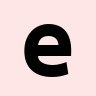

In [49]:
ims[0]

In [50]:
ims[0][:30]

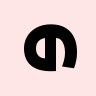

In [51]:
rearrange(ims[0], "h w c -> w h c")

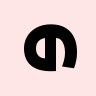

In [52]:
rearrange(ims[0], "w h c -> h w c")

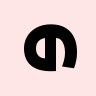

In [53]:
rearrange(ims[0], "height width channels -> width height channels")

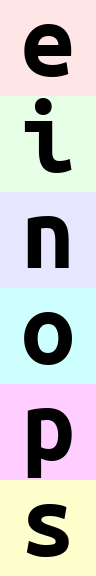

In [54]:
rearrange(ims, "index height width channels -> (index height) width channels")

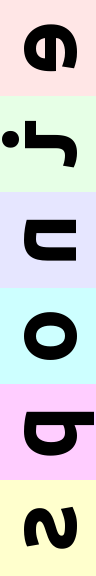

In [55]:
rearrange(ims, "index height width channels -> (index width) height channels")

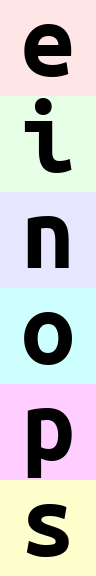

In [56]:
rearrange(ims, "index height width channels -> (index height) width channels")

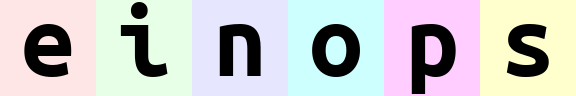

In [57]:
rearrange(ims, "index height width channels -> height (index width) channels")

In [58]:
rearrange(ims, "index height width channels -> height (index width) channels").shape

(96, 576, 3)

In [59]:
rearrange(ims, "index height width channels -> (height index width channels)")

array([1.        , 0.90196078, 0.90196078, ..., 1.        , 1.        ,
       0.80392157])
<array of shape (165888,)>


In [60]:
rearrange(ims, "(b1 b2) h w c -> b1 b2 h w c ", b1=2)

<array of shape (2, 3, 96, 96, 3)>


In [ ]:
rearrange(ims, "(b1 b2) h w c -> (b1 h) (b2 w) c ", b1=2)